In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import mplleaflet
from networkx.algorithms import bipartite


In [15]:
def gener_graph(csvdf):
    G = nx.DiGraph()
    #networkx update
    #from_pandas_dataframe
    G = nx.from_pandas_edgelist(csvdf, 'user_id', 'business_id')
    csvdf.columns=['user_stars','user_id','business_id','user_name','business_name','business_stars','review_count','latitude','longitude']
    nodes = csvdf[['business_id',"business_name","review_count",'latitude','longitude']].drop_duplicates(subset=None, keep='first', inplace=False)
    #networkx updata 
    #    nx.set_node_attributes(G,  pd.Series(nodes.review_count.values,'review_count', index=nodes.business_id).to_dict(),'review_count')
    nx.set_node_attributes(G,  pd.Series(nodes.review_count.values, index=nodes.business_id).to_dict(),'review_count')
    nx.set_node_attributes(G,  pd.Series(nodes.latitude.values, index=nodes.business_id).to_dict(),'latitude')
    nx.set_node_attributes(G,  pd.Series(nodes.longitude.values, index=nodes.business_id).to_dict(),'longitude')
    nx.set_node_attributes(G,  pd.Series(nodes.business_name.values, index=nodes.business_id).to_dict(), 'business_name')
    return G
def bipartite_business(csvdf):
    G = gener_graph(csvdf)
    business=set(csvdf['business_id'])
    G_b= bipartite.weighted_projected_graph(G, business)
    return G_b
def draw_bipartite(csvdf):
    G_b = bipartite_business(csvdf)
    node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G_b.nodes(data=True)}
    fig, ax = plt.subplots()

    edge_width = [1.5*G_b[u][v]['weight'] for u,v in G_b.edges()]
    node_size = [20*nx.get_node_attributes(G_b, 'review_count')[v] for v in G_b]
    node_color = [G_b.degree(v) for v in G_b]
    nx.draw_networkx(G_b,pos=node_positions,node_size=node_size,node_color=node_color, alpha=0.8,  with_labels=False,width=edge_width,edge_color='.4', cmap=plt.cm.Reds)

    mplleaflet.display(fig=ax.figure)
    plt.show()

** Markham restaurants review stars over 4**

In [16]:
markham_4=pd.read_csv('dataset/Markham.csv')
markham_4.shape

(4454, 9)

In [17]:
G_b4=bipartite_business(markham_4)

In [18]:
nodes = markham_4[['business_id',"business_name",'business_stars',"review_count",'latitude','longitude']].drop_duplicates(subset=None, keep='first', inplace=False)
#nodes.to_excel('nodes.xlsx')
nodes.head()

,business_id,business_name,business_stars,review_count,latitude,longitude
0,Cx0wkl85Xdw9OCQkbXMjzQ,Sushi Bong,4.0,93,43.8035,-79.4206
70,5XVabANkehj7oH-Z7YZkwg,Alchemy Coffee,4.0,231,43.8606,-79.3120
249,3AWtQN1iX9n9DjRfvxMEWw,Duck & Chicken,4.0,11,43.8059,-79.4220
257,0KQE_-HWEAL_eBKIsEFf3Q,Sakura Seoul,4.0,8,43.8034,-79.4194
263,XCxxPZ3Lu5mwmIo7IQRf1g,Osaka Sushi Japanese Korean Restaurant,4.0,236,43.8723,-79.2668


# top 10 restaurants ranking by reciew_count

In [19]:
nodes.sort_values(by=['review_count'],ascending=False).head(10)

,business_id,business_name,business_stars,review_count,latitude,longitude
767,xaqW4NkmUCGRRjmLxiFJ6Q,Muncheez,4.5,329,43.8032,-79.4195
1588,htQgj-ANQpZGpIpkkrEmyQ,Inspire Restaurant,4.0,299,43.8792,-79.2613
2506,f3gE6ZZFd7jRBjTVgt-mAg,Pa Pa Chang's,4.0,246,43.8915,-79.2656
263,XCxxPZ3Lu5mwmIo7IQRf1g,Osaka Sushi Japanese Korean Restaurant,4.0,236,43.8723,-79.2668
70,5XVabANkehj7oH-Z7YZkwg,Alchemy Coffee,4.0,231,43.8606,-79.3120
587,1_rqZz1K5Uoq2RvZlINfgA,Cho Sun Ok,4.0,195,43.8068,-79.4219
1268,hPTx2Y5e4Czbr21XcbDN8g,Mei Nung Beef Noodle House,4.0,173,43.8515,-79.3519
1115,K1nwSvx14on6eVBbu5E9rA,Good Catch Boil House,4.0,157,43.8496,-79.3224
3174,Cs8BaiKkyNU6mzxq9nTsmg,Congee Queen,4.0,150,43.8685,-79.2824
3975,YNpwfdqBeP6j8aFrJp2sQw,Sweet Esc,4.0,138,43.8240,-79.3264


**clustering coefficient**

In [20]:
nx.average_clustering(G_b4)

0.6767444340504007

In [21]:
#add business name as node label
node_labels = nx.get_node_attributes(G_b4, 'business_name')

In [ ]:
#draw network on map
node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G_b4.nodes(data=True)}
fig, ax = plt.subplots()

edge_width = [1.5*G_b4[u][v]['weight'] for u,v in G_b4.edges()]
node_size = [10*nx.get_node_attributes(G_b4, 'review_count')[v] for v in G_b4]
node_color = [G_b4.degree(v) for v in G_b4]
nx.draw_networkx(G_b4,pos=node_positions,node_size=node_size,node_color=node_color, edge_color='.4',alpha=0.6, with_labels=True,width=edge_width, cmap=plt.cm.Reds)
greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>10]
nx.draw_networkx_edges(G_b4,pos=node_positions, edgelist=greater_than_5, edge_color='r', alpha=0.4,width=4)
#nx.draw_networkx_labels(G_b4,pos=node_positions, labels=node_labels,font_size=16,font_color='b')

#mplleaflet.display(fig=ax.figure)
mplleaflet.show(path='markham-4stars.html')

In [23]:
#find isolate nodes
nx.isolates(G_b4)

<generator object isolates.<locals>.<genexpr> at 0x116b06f10>

In [48]:
#remove isolates
#networkx update
#remove = [node for node,degree in G_b4.degree().items() if degree < 1]
remove = [node for node,degree in dict(G_b4.degree()).items() if degree < 1]

In [49]:
G_b4.remove_nodes_from(remove)
G_b4.number_of_nodes()

139

In [51]:
deg=dict(nx.degree(G_b4))
#deg
import operator
degsort=sorted(deg.items(),key=operator.itemgetter(1),reverse=True)
#degsort

<Figure size 576x432 with 0 Axes>

(array([ 15.,  12.,  13.,   2.,   6.,   6.,   2.,   4.,   6.,   6.,   9.,
          7.,   5.,   6.,   3.,   3.,   5.,   5.,   1.,   3.,   1.,   1.,
          4.,   3.,   2.,   1.,   2.,   0.,   4.,   2.]),
 array([  1.        ,   3.96666667,   6.93333333,   9.9       ,
         12.86666667,  15.83333333,  18.8       ,  21.76666667,
         24.73333333,  27.7       ,  30.66666667,  33.63333333,
         36.6       ,  39.56666667,  42.53333333,  45.5       ,
         48.46666667,  51.43333333,  54.4       ,  57.36666667,
         60.33333333,  63.3       ,  66.26666667,  69.23333333,
         72.2       ,  75.16666667,  78.13333333,  81.1       ,
         84.06666667,  87.03333333,  90.        ]),
 <a list of 30 Patch objects>)

Text(0.5,1,'Histogram of Degree')

Text(0.5,0,'Degree')

Text(0,0.5,'Frequency')

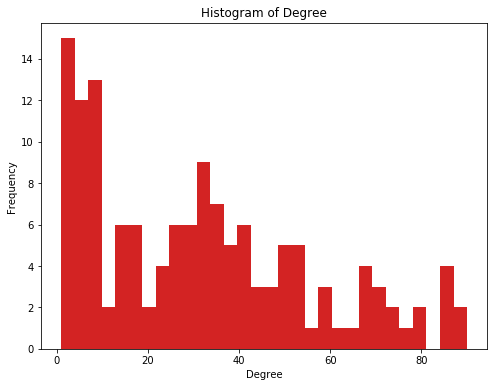

In [54]:
#degree distribution
df_deg = pd.DataFrame(degsort, columns=['id', 'degree'])
#df_deg.head()
plt.figure(figsize=(8,6))
plt.hist(df_deg['degree'],color='#D32323',bins=30)
plt.title("Histogram of Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig('degree.jpg')

plt.show()

In [58]:
#edge weight
#networkx update add list
df4 = pd.DataFrame(list(G_b4.edges(data=True)), columns=['business1', 'business2', 'weight'])
df4['weight'] = df4['weight'].map(lambda x: x['weight'])
df4.head()

,business1,business2,weight
0,T5f2zlczcS00W70e_omQ6w,B4SQCxWWvOLlyqHBFrNlSw,1
1,T5f2zlczcS00W70e_omQ6w,xaqW4NkmUCGRRjmLxiFJ6Q,2
2,T5f2zlczcS00W70e_omQ6w,Hk1Q874UqawFXq0XzIIBYg,1
3,T5f2zlczcS00W70e_omQ6w,ibPjt-h9NC7OEzpj7IL83Q,1
4,T5f2zlczcS00W70e_omQ6w,5XVabANkehj7oH-Z7YZkwg,1


<Figure size 576x432 with 0 Axes>

(array([  1.73000000e+03,   1.51000000e+02,   7.30000000e+01,
          5.90000000e+01,   3.80000000e+01,   3.90000000e+01,
          2.00000000e+01,   1.50000000e+01,   2.00000000e+01,
          7.00000000e+00,   8.00000000e+00,   8.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([  1.        ,   2.03333333,   3.06666667,   4.1       ,
          5.13333333,   6.16666667,   7.2       ,   8.23333333,
          9.26666667,  10.3       ,  11.33333333,  12.36666667,
         13.4       ,  14.43333333,  15.46666667,  16.5       ,
         17.53333333,  18.56666667,  19.6       ,  20.63333333,
         21.66666667,  22.7       ,  23.73333333,  24.7666

Text(0.5,1,'Histogram of Weight')

Text(0.5,0,'Weight')

Text(0,0.5,'Frequency')

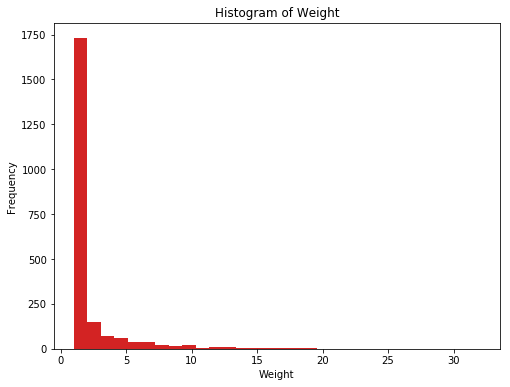

In [60]:
#weight distribution
plt.figure(figsize=(8,6))
#plt.subplot(1,1,1,axisbg=(1,1,1))
plt.hist(df4['weight'],color='#D32323',bins=30)
plt.title("Histogram of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
#plt.savefig('weight.jpg')
plt.show()

(-0.78044894958075084,
 1.0105265998173207,
 -1.08876494546854,
 0.74723433016888607)

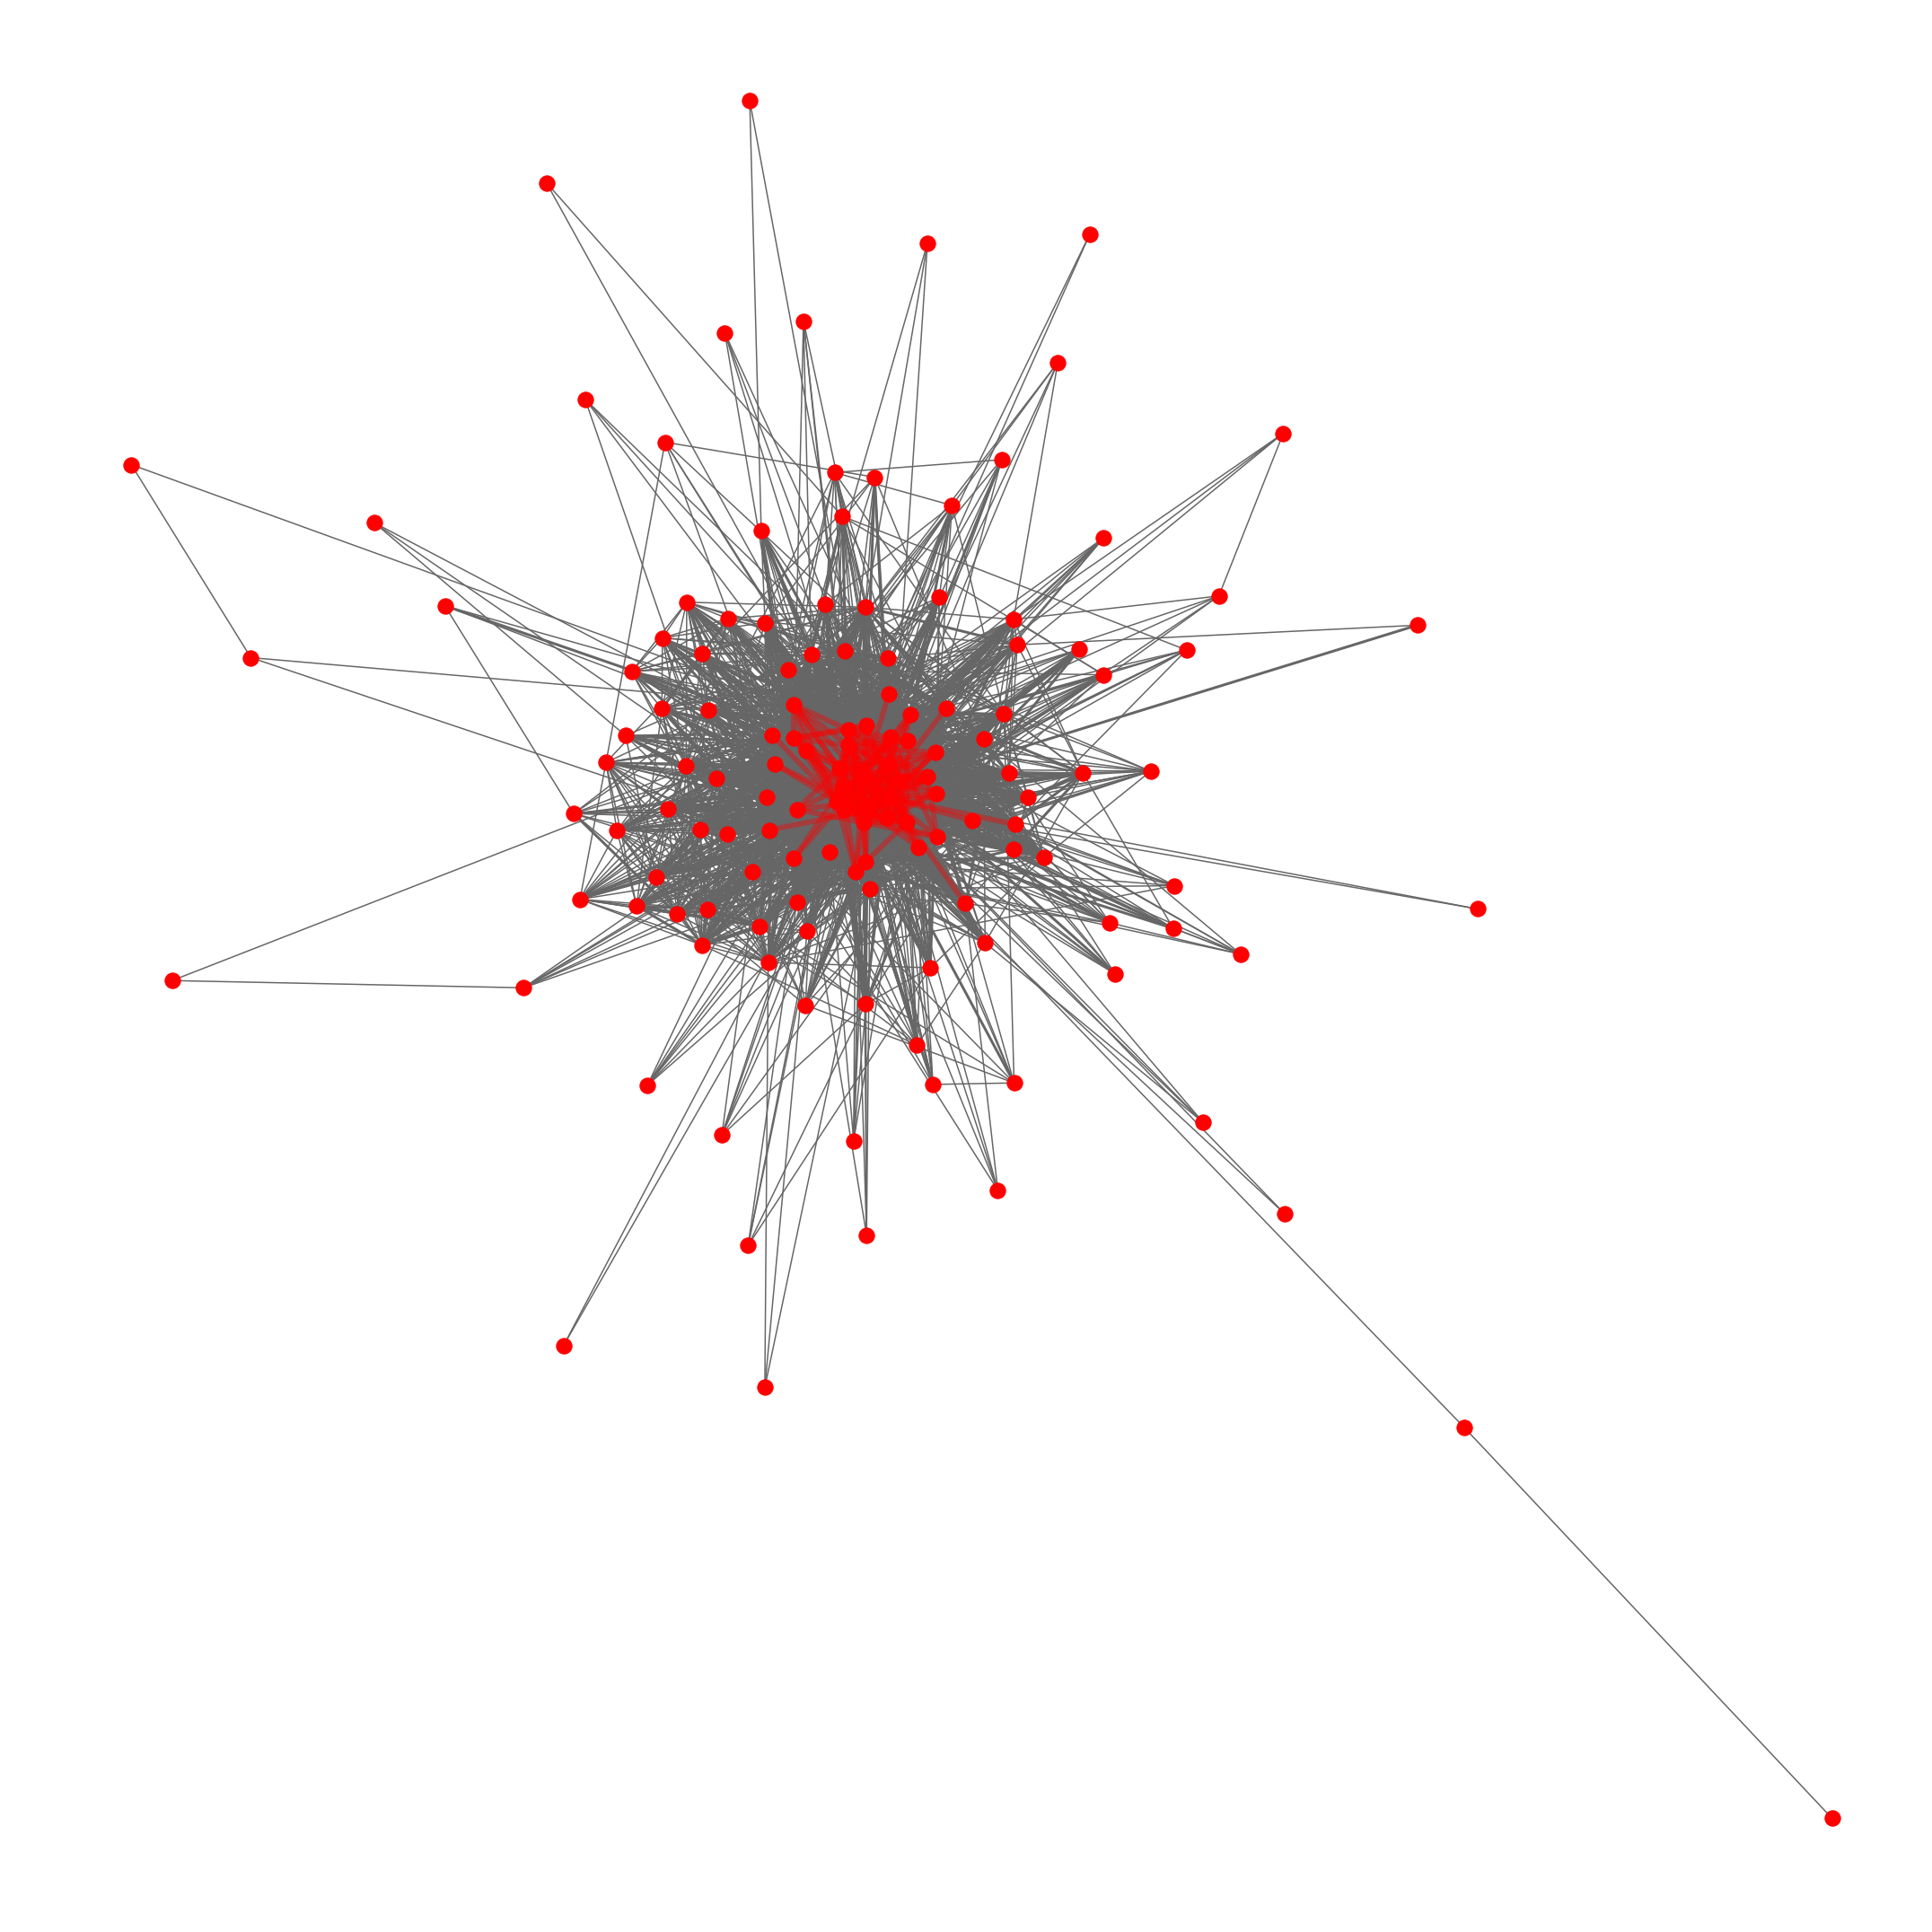

In [62]:
#draw network without map
pos = nx.spring_layout(G_b4)
edge_width = [1.5*G_b4[u][v]['weight'] for u,v in G_b4.edges()]
nx.draw_networkx(G_b4,pos,with_labels=False,width=edge_width,edge_color='.4')
greater_than_5 = [x for x in list(G_b4.edges(data=True)) if x[2]['weight']>5]
nx.draw_networkx_edges(G_b4,pos, edgelist=greater_than_5, edge_color='r', alpha=0.4, width=6)
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 30,30
#plt.figure(figsize=(40,40))
plt.axis('off')
plt.tight_layout();
plt.show()

In [64]:
#get betweeness centrality ranking
btwnCent = nx.betweenness_centrality(G_b4,normalized= True,endpoints=False)
btwsort=sorted(btwnCent.items(),key=operator.itemgetter(1),reverse=True)
df_btw = pd.DataFrame(btwsort, columns=['business_id', 'btw'])
df1=df_btw.head(10)
topbtw=df1['business_id'].values.tolist()
#topbtw
df1
#btwsort

,business_id,btw
0,f3gE6ZZFd7jRBjTVgt-mAg,0.061673
1,xaqW4NkmUCGRRjmLxiFJ6Q,0.048997
2,5XVabANkehj7oH-Z7YZkwg,0.046382
3,htQgj-ANQpZGpIpkkrEmyQ,0.042539
4,pOvTYClFgMm-wAXPW1CnhQ,0.040563
5,bNqBMZ00lnhhfxzV8OhLfQ,0.036563
6,Cs8BaiKkyNU6mzxq9nTsmg,0.036398
7,l9vx-OTdDPU-oHZ17aVxdg,0.035940
8,kNZJMnTNXj42EfUGX3eRcw,0.035000
9,hPTx2Y5e4Czbr21XcbDN8g,0.034981


# Top 10 restaurants ranking by betweenness centrailty

In [67]:
#nodes.loc[nodes['business_id'].isin(topbtw)]
pd.merge(df1,nodes.loc[nodes['business_id'].isin(topbtw)]).to_excel('topbtw.xlsx')
pd.merge(df1,nodes.loc[nodes['business_id'].isin(topbtw)])

,business_id,btw,business_name,business_stars,review_count,latitude,longitude
0,f3gE6ZZFd7jRBjTVgt-mAg,0.061673,Pa Pa Chang's,4.0,246,43.8915,-79.2656
1,xaqW4NkmUCGRRjmLxiFJ6Q,0.048997,Muncheez,4.5,329,43.8032,-79.4195
2,5XVabANkehj7oH-Z7YZkwg,0.046382,Alchemy Coffee,4.0,231,43.8606,-79.3120
3,htQgj-ANQpZGpIpkkrEmyQ,0.042539,Inspire Restaurant,4.0,299,43.8792,-79.2613
4,pOvTYClFgMm-wAXPW1CnhQ,0.040563,Bamiyan Kabob,4.0,106,43.8551,-79.2563
5,bNqBMZ00lnhhfxzV8OhLfQ,0.036563,Big Bone BBQ & Wicked Wings,4.0,136,43.8748,-79.2803
6,Cs8BaiKkyNU6mzxq9nTsmg,0.036398,Congee Queen,4.0,150,43.8685,-79.2824
7,l9vx-OTdDPU-oHZ17aVxdg,0.035940,Federick Restaurant,4.0,133,43.8512,-79.2534
8,kNZJMnTNXj42EfUGX3eRcw,0.035000,Los Chicos Brasa,4.0,114,43.8504,-79.2539
9,hPTx2Y5e4Czbr21XcbDN8g,0.034981,Mei Nung Beef Noodle House,4.0,173,43.8515,-79.3519


# Top 10 restaurants ranking by closeness centrailty

In [69]:
closeCent = nx.closeness_centrality(G_b4)
closesort=sorted(closeCent.items(),key=operator.itemgetter(1),reverse=True)
df_cls = pd.DataFrame(closesort, columns=['business_id', 'cls'])
df2=df_cls.head(10)
topcls=df2['business_id'].values.tolist()
#nodes.loc[nodes['business_id'].isin(topcls)].to_excel('topcls.xlsx')
#nodes.loc[nodes['business_id'].isin(topcls)]
pd.merge(df2,nodes.loc[nodes['business_id'].isin(topcls)]).to_excel('topcls.xlsx')
pd.merge(df2,nodes.loc[nodes['business_id'].isin(topcls)])

,business_id,cls,business_name,business_stars,review_count,latitude,longitude
0,5XVabANkehj7oH-Z7YZkwg,0.737968,Alchemy Coffee,4.0,231,43.8606,-79.3120
1,f3gE6ZZFd7jRBjTVgt-mAg,0.737968,Pa Pa Chang's,4.0,246,43.8915,-79.2656
2,xaqW4NkmUCGRRjmLxiFJ6Q,0.726316,Muncheez,4.5,329,43.8032,-79.4195
3,htQgj-ANQpZGpIpkkrEmyQ,0.726316,Inspire Restaurant,4.0,299,43.8792,-79.2613
4,K1nwSvx14on6eVBbu5E9rA,0.718750,Good Catch Boil House,4.0,157,43.8496,-79.3224
5,bNqBMZ00lnhhfxzV8OhLfQ,0.718750,Big Bone BBQ & Wicked Wings,4.0,136,43.8748,-79.2803
6,1_rqZz1K5Uoq2RvZlINfgA,0.700508,Cho Sun Ok,4.0,195,43.8068,-79.4219
7,XCxxPZ3Lu5mwmIo7IQRf1g,0.696970,Osaka Sushi Japanese Korean Restaurant,4.0,236,43.8723,-79.2668
8,pOvTYClFgMm-wAXPW1CnhQ,0.686567,Bamiyan Kabob,4.0,106,43.8551,-79.2563
9,Cs8BaiKkyNU6mzxq9nTsmg,0.683168,Congee Queen,4.0,150,43.8685,-79.2824


# Top 10 restaurants ranking by eigenvector centrailty

In [71]:
eigcen=nx.eigenvector_centrality_numpy(G_b4) 
eigensort=sorted(eigcen.items(),key=operator.itemgetter(1),reverse=True)
df_eig = pd.DataFrame(eigensort, columns=['business_id', 'eig'])
df3=df_eig.head(10)
topeig=df3['business_id'].values.tolist()
#nodes.loc[nodes['business_id'].isin(topeig)].to_excel('topeig.xlsx')
#nodes.loc[nodes['business_id'].isin(topeig)]
pd.merge(df3,nodes.loc[nodes['business_id'].isin(topeig)]).to_excel('topeig.xlsx')
pd.merge(df3,nodes.loc[nodes['business_id'].isin(topeig)])

,business_id,eig,business_name,business_stars,review_count,latitude,longitude
0,5XVabANkehj7oH-Z7YZkwg,0.172444,Alchemy Coffee,4.0,231,43.8606,-79.3120
1,f3gE6ZZFd7jRBjTVgt-mAg,0.167778,Pa Pa Chang's,4.0,246,43.8915,-79.2656
2,K1nwSvx14on6eVBbu5E9rA,0.167654,Good Catch Boil House,4.0,157,43.8496,-79.3224
3,bNqBMZ00lnhhfxzV8OhLfQ,0.164314,Big Bone BBQ & Wicked Wings,4.0,136,43.8748,-79.2803
4,xaqW4NkmUCGRRjmLxiFJ6Q,0.162669,Muncheez,4.5,329,43.8032,-79.4195
5,1_rqZz1K5Uoq2RvZlINfgA,0.162583,Cho Sun Ok,4.0,195,43.8068,-79.4219
6,htQgj-ANQpZGpIpkkrEmyQ,0.161360,Inspire Restaurant,4.0,299,43.8792,-79.2613
7,LKDGDUiDKTuo93gwF5guPA,0.155002,Tasty House,4.0,36,43.8498,-79.3477
8,XCxxPZ3Lu5mwmIo7IQRf1g,0.152917,Osaka Sushi Japanese Korean Restaurant,4.0,236,43.8723,-79.2668
9,Cs8BaiKkyNU6mzxq9nTsmg,0.150570,Congee Queen,4.0,150,43.8685,-79.2824


In [27]:
degcen=nx.degree_centrality(G_b4)
degreesort=sorted(degcen.items(),key=operator.itemgetter(1),reverse=True)
df_degree = pd.DataFrame(degreesort, columns=['id', 'degreecen'])
df_degree.head()

,id,degreecen
0,5XVabANkehj7oH-Z7YZkwg,0.652174
1,f3gE6ZZFd7jRBjTVgt-mAg,0.644928
2,htQgj-ANQpZGpIpkkrEmyQ,0.630435
3,xaqW4NkmUCGRRjmLxiFJ6Q,0.630435
4,K1nwSvx14on6eVBbu5E9rA,0.615942


In [28]:
clustering=nx.clustering(G_b4)
clustersort=sorted(clustering.items(),key=operator.itemgetter(1),reverse=True)
df_cluster = pd.DataFrame(clustersort, columns=['id', 'clustercent'])
df_cluster.head()

,id,clustercent
0,mVtV6vSMMMxLk_zIWYWG0A,1.0
1,0KQE_-HWEAL_eBKIsEFf3Q,1.0
2,d6XTJ4SO1FkORkPc9IJJZQ,1.0
3,pQUjQZgOzUX-KUXYHZKpng,1.0
4,vBIugbXbkxNb5tCtck1tSg,1.0


In [29]:
#degree centrality v.s. clustering  clustering coefficient
degree_cluster=pd.merge(df_degree,df_cluster,on='id')
degree_cluster.head()

,id,degreecen,clustercent
0,5XVabANkehj7oH-Z7YZkwg,0.652174,0.425968
1,f3gE6ZZFd7jRBjTVgt-mAg,0.644928,0.410112
2,htQgj-ANQpZGpIpkkrEmyQ,0.630435,0.399358
3,xaqW4NkmUCGRRjmLxiFJ6Q,0.630435,0.405774
4,K1nwSvx14on6eVBbu5E9rA,0.615942,0.452381


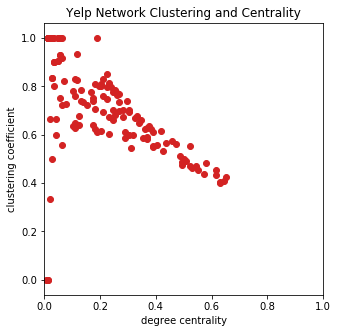

In [30]:
#plt.subplot(1,1,1,axisbg=(1,1,1))
plt.figure(figsize=(5,5))
plt.scatter(degree_cluster.degreecen,degree_cluster.clustercent,color='#D32323')
plt.xlabel("degree centrality")
plt.ylabel("clustering coefficient")
plt.xlim(0,1)
plt.title("Yelp Network Clustering and Centrality")
plt.savefig("clustering$centrality.jpg")
plt.show()

In [31]:
#degree centrality v.s. review
df_review=nodes[['business_id',"review_count"]]
df_review.columns=['id','review_count']
#df_review
degree_review=pd.merge(df_degree,df_review,on='id')
degree_review.head()

,id,degreecen,review_count
0,5XVabANkehj7oH-Z7YZkwg,0.652174,231
1,f3gE6ZZFd7jRBjTVgt-mAg,0.644928,246
2,htQgj-ANQpZGpIpkkrEmyQ,0.630435,299
3,xaqW4NkmUCGRRjmLxiFJ6Q,0.630435,329
4,K1nwSvx14on6eVBbu5E9rA,0.615942,157


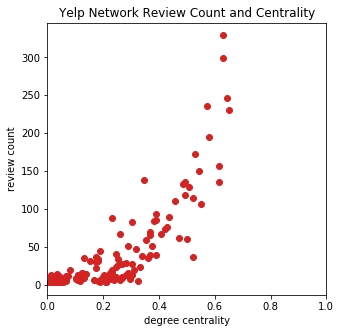

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(degree_review.degreecen,degree_review.review_count,color='#D32323')
plt.xlabel("degree centrality")
plt.ylabel("review count")
plt.xlim(0,1)
plt.title("Yelp Network Review Count and Centrality")
plt.savefig("review$centrality.jpg")
plt.show()

# detect community

In [72]:
remove2 = [node for node,degree in dict(G_b4.degree()).items() if degree < 11]

In [73]:
G_b4.remove_nodes_from(remove2)
G_b4.number_of_nodes()

98

In [74]:
import community
partition = community.best_partition(G_b4)
partition

{'-7EwIdxcRC5McO35DVfeSQ': 0,
 '-Lgj3gdQZiVngAEc1yALzw': 2,
 '0tAbgK3TT6bNHtT4KOHZCQ': 0,
 '1_rqZz1K5Uoq2RvZlINfgA': 2,
 '2iSXzsmucGHn_NM51y29bQ': 2,
 '3AWtQN1iX9n9DjRfvxMEWw': 0,
 '5XVabANkehj7oH-Z7YZkwg': 2,
 '6Bmq3b91hqTwMFn5cpPWzQ': 0,
 '7wi0yczEe3OC3P8CpkZz2g': 2,
 '872bhARqHoDEljyEboTDew': 2,
 '8lPxiYChdJdTV24NJvOB3Q': 0,
 '8xPmlVJy2o6x0J04CBpEMQ': 2,
 '9AVuEdSl85ZEd49zrdsK5g': 0,
 '9fKYo_6qLPofBbts0JAnSw': 1,
 '9q_O836mXia6Lqkirl2Ynw': 1,
 'Ac0kKKfYGM-vKORWCg20eg': 1,
 'AuKKWh7jc1G7G_P_l8fd-g': 2,
 'B4SQCxWWvOLlyqHBFrNlSw': 0,
 'CC8AIB3g1d88YVpmaUsVgA': 2,
 'Cs8BaiKkyNU6mzxq9nTsmg': 1,
 'Cx0wkl85Xdw9OCQkbXMjzQ': 2,
 'FfA7BYSEc46Y3lKHOiqn4g': 1,
 'GkY6UWWn0Fz2ehcuBp66pg': 0,
 'Hk1Q874UqawFXq0XzIIBYg': 2,
 'I8cCdp3q_5oCEykzZgPkQw': 2,
 'II44-On32pZWqzfpke7zhg': 0,
 'J6x28YX3K7ErHU0uPMSfyA': 2,
 'JpyHiBZtQel1b0OuvRz_pw': 2,
 'K1nwSvx14on6eVBbu5E9rA': 2,
 'KsaVx2E63ZMXUQfrxcp_XQ': 0,
 'LCvbdVqfIZkxHwWwN4uisg': 2,
 'LKDGDUiDKTuo93gwF5guPA': 0,
 'LdOSw3VbUZOmqup0jeU_Dw': 2,
 'MCXLDCA9

In [75]:
#modularity
mod = community.modularity(partition, G_b4)
mod

0.1279935870056925

In [113]:
#networkx update 
#nx.set_node_attributes(G_b4, 'modularity', partition)
nx.set_node_attributes(G_b4,  partition,'modularity')
class0 = [node for node,mod in dict(G_b4.nodes(data='modularity')).items() if mod == 0]
#class0
nodes.loc[nodes['business_id'].isin(class0)].to_excel('class.xlsx')

In [114]:
class1 = [node for node,mod in dict(G_b4.nodes(data='modularity')).items() if mod == 1]
nodes.loc[nodes['business_id'].isin(class1)].to_excel('class1.xlsx')

In [115]:
class2 = [node for node,mod in dict(G_b4.nodes(data='modularity')).items() if mod == 2]
nodes.loc[nodes['business_id'].isin(class2)].to_excel('class2.xlsx')
class3 = [node for node,mod in dict(G_b4.nodes(data='modularity')).items() if mod == 3]
nodes.loc[nodes['business_id'].isin(class3)].to_excel('class3.xlsx')

(-1.0998127246970122,
 1.1054108235186713,
 -1.0477740600263954,
 1.0356379588809554)

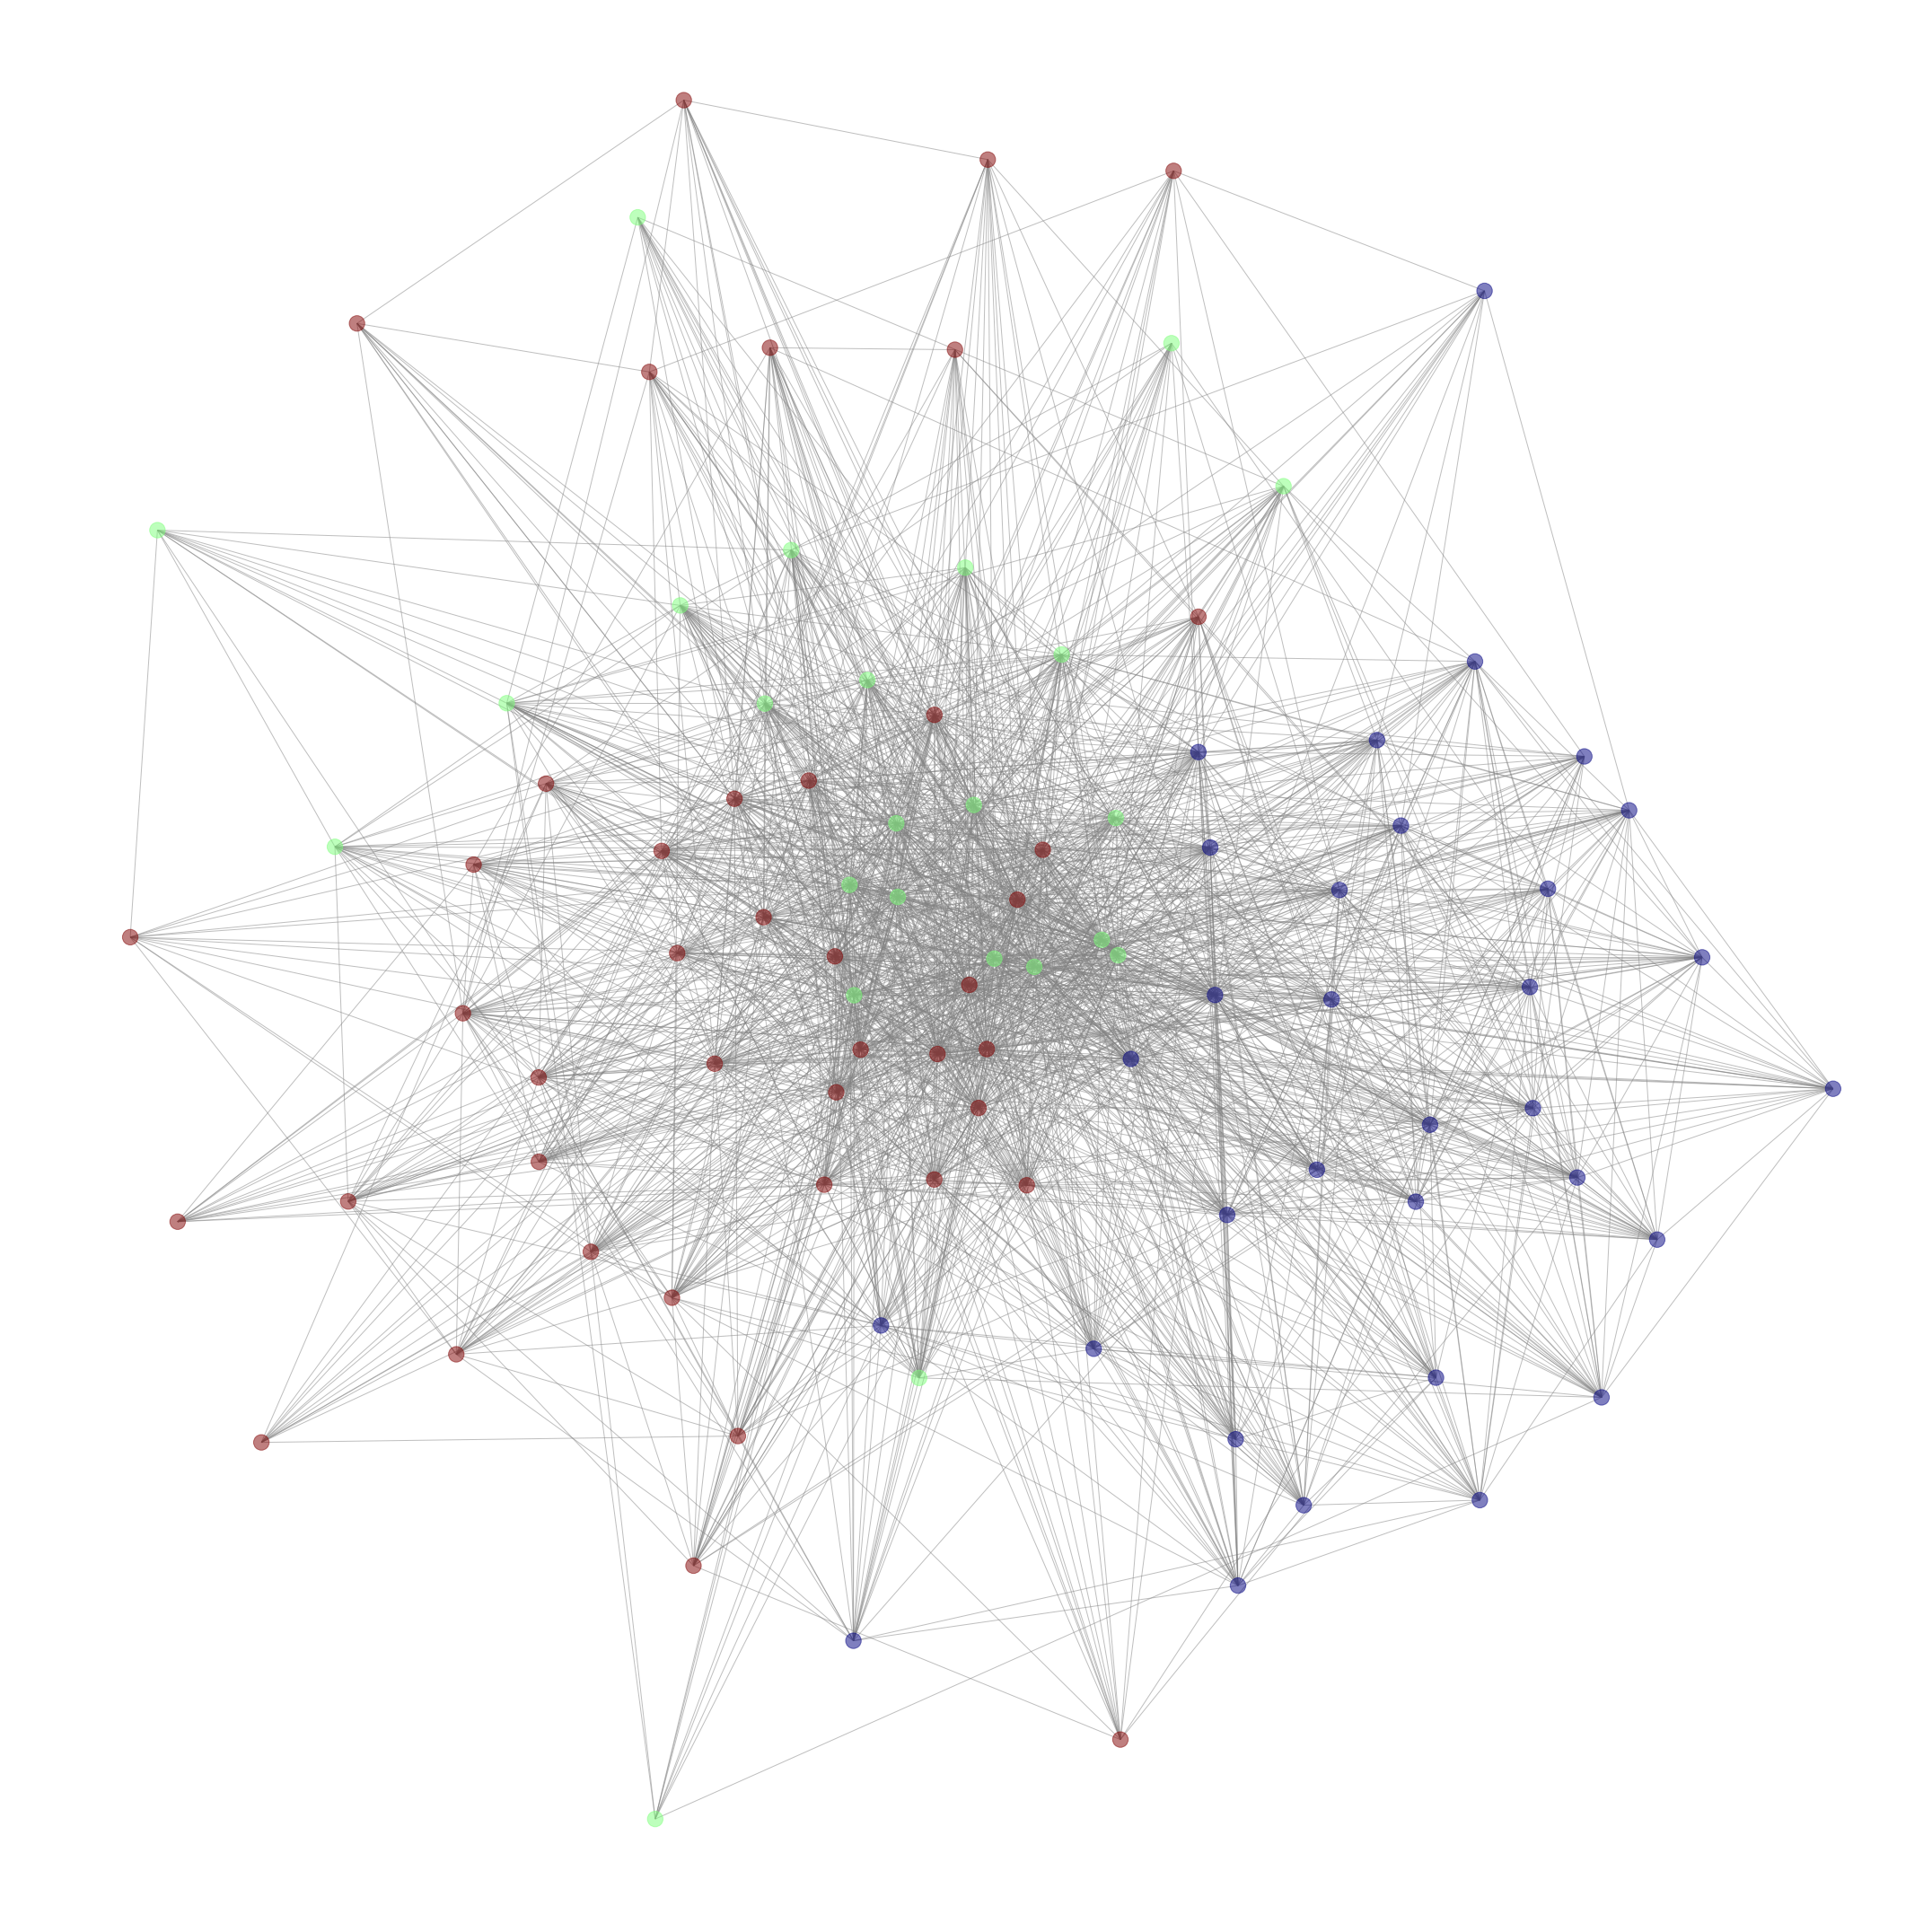

In [116]:
values = [partition.get(node) for node in G_b4.nodes()]
pos = nx.spring_layout(G_b4)
nx.draw_networkx(G_b4,pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=300, edge_color="gray",alpha=0.5,with_labels=False)
rcParams['figure.figsize'] = 15,15
#plt.savefig('community.jpg')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#map
node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G_b6.nodes(data=True)}
fig, ax = plt.subplots()

#edge_width = [1.5*G_b6[u][v]['weight'] for u,v in G_b6.edges()]
#node_size = [10*nx.get_node_attributes(G_b6, 'review_count')[v] for v in G_b6]
node_color = [partition.get(node) for node in G_b6.nodes()]
nx.draw_networkx(G_b6,pos=node_positions,node_color=node_color, edge_color='.4',alpha=0.6, with_labels=False, cmap=plt.get_cmap('jet'))
#greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>10]
#nx.draw_networkx_edges(G_b4,pos=node_positions, edgelist=greater_than_5, edge_color='r', alpha=0.4,width=edge_width)
#nx.draw_networkx_labels(G_b4,pos=node_positions, labels=node_labels,font_size=16,font_color='b')

mplleaflet.display(fig=ax.figure)

# strong ties

In [123]:
remove3 = [x for x in G_b4.edges(data=True) if x[2]['weight']<11]

In [125]:
G_b4.remove_edges_from(remove3)
G_b4.number_of_edges()

43

In [128]:
remove4 = [node for node,degree in dict(G_b4.degree()).items() if degree < 1]

In [130]:
G_b4.remove_nodes_from(remove4)
G_b4.number_of_nodes()

20

In [139]:
G_b4.nodes(data=True)

NodeDataView({'xaqW4NkmUCGRRjmLxiFJ6Q': {'review_count': 329, 'latitude': 43.8032, 'longitude': -79.4195, 'business_name': 'Muncheez', 'modularity': 2}, 'zBd5JvFWuMGlnCYLaGsXZg': {'review_count': 110, 'latitude': 43.8891, 'longitude': -79.3149, 'business_name': 'Pho Metro', 'modularity': 2}, 'K1nwSvx14on6eVBbu5E9rA': {'review_count': 157, 'latitude': 43.8496, 'longitude': -79.3224, 'business_name': 'Good Catch Boil House', 'modularity': 2}, 'kNZJMnTNXj42EfUGX3eRcw': {'review_count': 114, 'latitude': 43.8504, 'longitude': -79.2539, 'business_name': 'Los Chicos Brasa', 'modularity': 1}, 'XCxxPZ3Lu5mwmIo7IQRf1g': {'review_count': 236, 'latitude': 43.8723, 'longitude': -79.2668, 'business_name': 'Osaka Sushi Japanese Korean Restaurant', 'modularity': 1}, '8xPmlVJy2o6x0J04CBpEMQ': {'review_count': 135, 'latitude': 43.8572, 'longitude': -79.3033, 'business_name': 'Toast Delight', 'modularity': 2}, 'ax4ztJvW28xgGvI0OPqGcQ': {'review_count': 129, 'latitude': 43.8613, 'longitude': -79.3048, 'bu

In [141]:
node_labels = nx.get_node_attributes(G_b4,'business_name')
#node_labels

{'1_rqZz1K5Uoq2RvZlINfgA': 'Cho Sun Ok',
 '5XVabANkehj7oH-Z7YZkwg': 'Alchemy Coffee',
 '8xPmlVJy2o6x0J04CBpEMQ': 'Toast Delight',
 'Cs8BaiKkyNU6mzxq9nTsmg': 'Congee Queen',
 'Cx0wkl85Xdw9OCQkbXMjzQ': 'Sushi Bong',
 'K1nwSvx14on6eVBbu5E9rA': 'Good Catch Boil House',
 'TITY-kzuk2hLumFrPnVlgA': 'Funky Munky Cafe',
 'XCxxPZ3Lu5mwmIo7IQRf1g': 'Osaka Sushi Japanese Korean Restaurant',
 'YNpwfdqBeP6j8aFrJp2sQw': 'Sweet Esc',
 'ax4ztJvW28xgGvI0OPqGcQ': 'New City Restaurant',
 'bNqBMZ00lnhhfxzV8OhLfQ': 'Big Bone BBQ & Wicked Wings',
 'f3gE6ZZFd7jRBjTVgt-mAg': "Pa Pa Chang's",
 'hDO8bWV_Ua8NxtfpStuuZg': 'Initium',
 'hPTx2Y5e4Czbr21XcbDN8g': 'Mei Nung Beef Noodle House',
 'htQgj-ANQpZGpIpkkrEmyQ': 'Inspire Restaurant',
 'kNZJMnTNXj42EfUGX3eRcw': 'Los Chicos Brasa',
 'pOvTYClFgMm-wAXPW1CnhQ': 'Bamiyan Kabob',
 'sePTDv1dGHPID7kwuNzXaA': "Sam's Congee Delight",
 'xaqW4NkmUCGRRjmLxiFJ6Q': 'Muncheez',
 'zBd5JvFWuMGlnCYLaGsXZg': 'Pho Metro'}

{('5XVabANkehj7oH-Z7YZkwg',
  'TITY-kzuk2hLumFrPnVlgA'): Text(-0.547595,0.447932,'13'),
 ('5XVabANkehj7oH-Z7YZkwg',
  'f3gE6ZZFd7jRBjTVgt-mAg'): Text(-0.0668377,0.098396,'11'),
 ('5XVabANkehj7oH-Z7YZkwg',
  'htQgj-ANQpZGpIpkkrEmyQ'): Text(-0.106913,0.0419241,'17'),
 ('8xPmlVJy2o6x0J04CBpEMQ',
  '5XVabANkehj7oH-Z7YZkwg'): Text(-0.321863,0.29269,'16'),
 ('8xPmlVJy2o6x0J04CBpEMQ',
  'htQgj-ANQpZGpIpkkrEmyQ'): Text(-0.173427,0.0544247,'12'),
 ('Cs8BaiKkyNU6mzxq9nTsmg',
  'f3gE6ZZFd7jRBjTVgt-mAg'): Text(-0.0941768,-0.232747,'13'),
 ('K1nwSvx14on6eVBbu5E9rA',
  '5XVabANkehj7oH-Z7YZkwg'): Text(-0.173633,0.162774,'27'),
 ('K1nwSvx14on6eVBbu5E9rA',
  '8xPmlVJy2o6x0J04CBpEMQ'): Text(-0.240147,0.175274,'11'),
 ('K1nwSvx14on6eVBbu5E9rA',
  'Cs8BaiKkyNU6mzxq9nTsmg'): Text(-0.200972,-0.168369,'11'),
 ('K1nwSvx14on6eVBbu5E9rA',
  'bNqBMZ00lnhhfxzV8OhLfQ'): Text(0.137596,-0.115591,'12'),
 ('K1nwSvx14on6eVBbu5E9rA',
  'f3gE6ZZFd7jRBjTVgt-mAg'): Text(0.0148785,-0.0190197,'18'),
 ('K1nwSvx14on6eVBbu5E9rA

(-0.93830089586819043,
 1.0001906861445806,
 -1.025029765998168,
 1.1075566102542418)

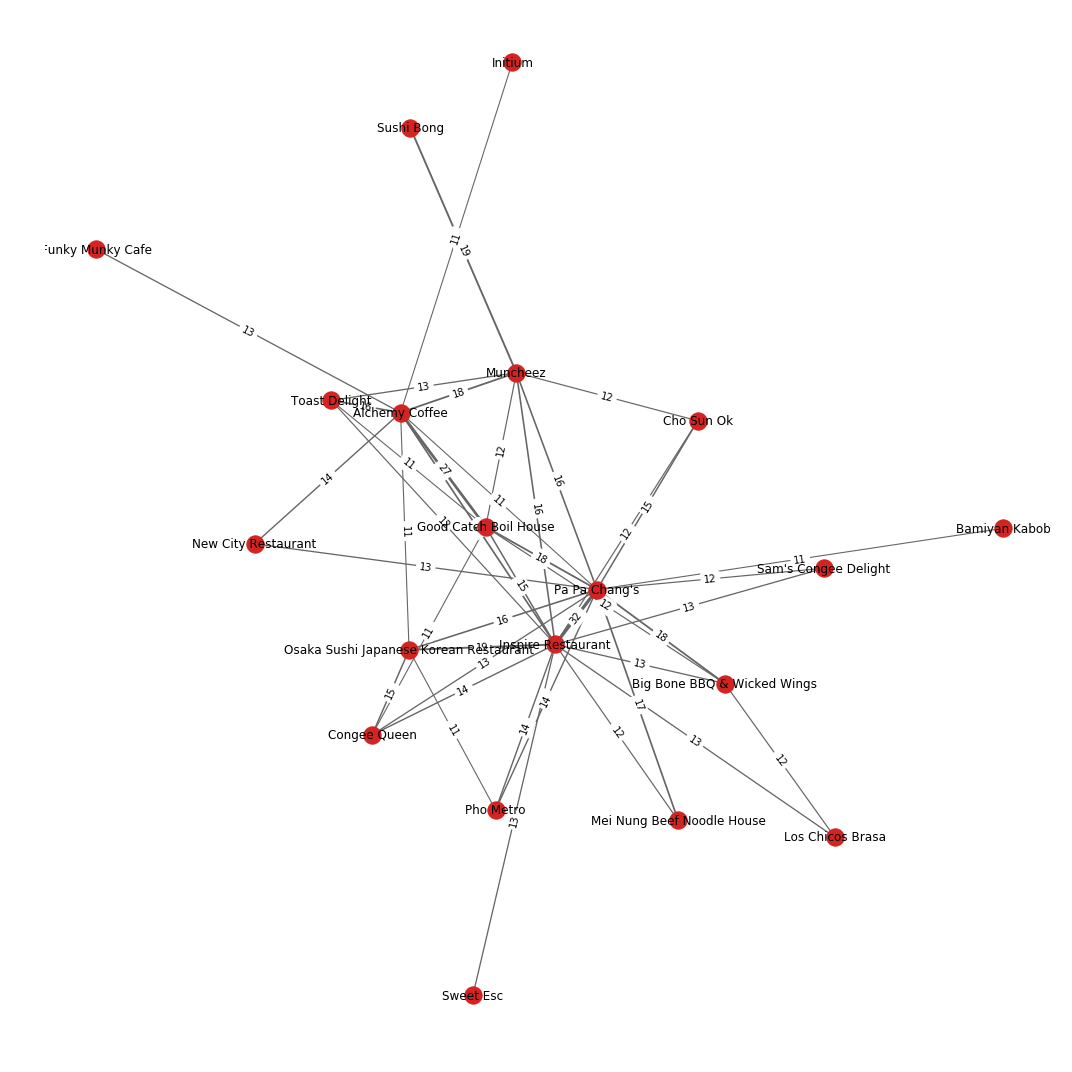

In [142]:
pos = nx.spring_layout(G_b4)
edge_width = [0.1*G_b4[u][v]['weight'] for u,v in G_b4.edges()]
labels = nx.get_edge_attributes(G_b4,'weight')
nx.draw_networkx(G_b4,pos,labels=node_labels,with_labels=True,width=edge_width,edge_color='.4',node_color='#D32323')
nx.draw_networkx_edge_labels(G_b4,pos,edge_labels=labels)
#greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>5]
#nx.draw_networkx_edges(G_b4,pos, edgelist=greater_than_5, edge_color='r', alpha=0.4, width=6)
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 10,10
#plt.figure(figsize=(40,40))
plt.axis('off')
plt.tight_layout();
#plt.savefig('topweight.jpg')
plt.show()